References
* https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
* https://stackoverflow.com/questions/30885715/how-do-i-show-major-ticks-as-the-first-day-of-each-months-and-minor-ticks-as-eac
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html

In [41]:
# Dependencies
import pandas as pd
import random
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mpldt

In [2]:
# Import in dataset
df = pd.read_csv('se-weather-cleaned.csv')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-STDDEV,DLY-TMAX-NORMAL,DLY-TMAX-STDDEV,DLY-TMIN-NORMAL,DLY-TMIN-STDDEV,STATE,COUNTY,ZIP
0,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-01,29.8,10.3,38.6,11.8,21.0,10.4,WV,Alamance County,27258
1,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-02,29.7,10.3,38.5,11.8,20.9,10.5,WV,Alamance County,27258
2,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-03,29.7,10.4,38.4,11.9,20.9,10.6,WV,Alamance County,27258
3,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-04,29.6,10.4,38.4,11.9,20.8,10.6,WV,Alamance County,27258
4,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-05,29.5,10.5,38.3,11.9,20.8,10.7,WV,Alamance County,27258


In [3]:
# Pull out only NC data
df_nc = df.loc[df['STATE'] == 'NC']
df_nc.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-STDDEV,DLY-TMAX-NORMAL,DLY-TMAX-STDDEV,DLY-TMIN-NORMAL,DLY-TMIN-STDDEV,STATE,COUNTY,ZIP
110166,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-01,2.9,NaN,8.6,NaN,-2.8,NaN,NC,Alamance County,27258
110167,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-02,2.8,NaN,8.6,NaN,-2.9,NaN,NC,Alamance County,27258
110168,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-03,2.8,NaN,8.5,NaN,-3.0,NaN,NC,Alamance County,27258
110169,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-04,2.7,NaN,8.5,NaN,-3.1,NaN,NC,Alamance County,27258
110170,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-05,2.7,NaN,8.4,NaN,-3.1,NaN,NC,Alamance County,27258


In [4]:
# Determine number of unique stations in dataset
num_stations = df_nc['STATION'].nunique()
num_stations

159

In [9]:
# Create list of stations by name
station_names = df_nc['NAME'].unique()

# Randomly select one station from this list
rand_station = station_names[random.randint(0, len(station_names))]
rand_station

'CEDAR ISLAND, NC US'

In [11]:
# Filter the dataset to only this station and sort by date
rand_station_df = df_nc.loc[df_nc['NAME'] == rand_station].sort_values(by=['DATE'])
rand_station_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-STDDEV,DLY-TMAX-NORMAL,DLY-TMAX-STDDEV,DLY-TMIN-NORMAL,DLY-TMIN-STDDEV,STATE,COUNTY,ZIP
162138,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,01-01,7.4,-12.4,13.7,-11.7,1.2,-12.2,NC,Carteret County,28520
162139,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,01-02,7.4,-12.4,13.6,-11.7,1.2,-12.2,NC,Carteret County,28520
162140,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,01-03,7.3,-12.4,13.6,-11.7,1.1,-12.2,NC,Carteret County,28520
162141,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,01-04,7.3,-12.4,13.5,-11.7,1.1,-12.2,NC,Carteret County,28520
162142,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,01-05,7.3,-12.4,13.5,-11.7,1.0,-12.2,NC,Carteret County,28520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162499,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,12-27,7.7,-12.6,14.0,-11.8,1.5,-12.2,NC,Carteret County,28520
162500,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,12-28,7.7,-12.5,13.9,-11.8,1.4,-12.2,NC,Carteret County,28520
162501,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,12-29,7.6,-12.5,13.8,-11.8,1.4,-12.2,NC,Carteret County,28520
162502,USC00311606,"CEDAR ISLAND, NC US",34.9833,-76.3,2.4,12-30,7.6,-12.5,13.8,-11.8,1.3,-12.2,NC,Carteret County,28520


In [ ]:
# Store desired temperature boundaries for laying epoxy
max_temp_C = 37.78
max_temp_F = 100
min_temp_C = 10
min_temp_F = 

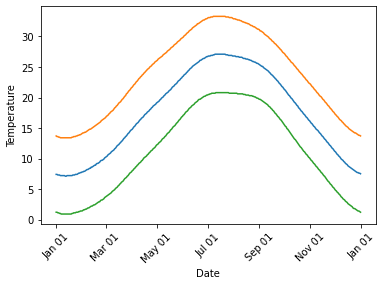

In [50]:
# Plot normals on graph

# Remove leapyear date
station_plot_df = rand_station_df[rand_station_df['DATE'] != '02-29']
fig, ax = plt.subplots()

# Create x and y's for normals
x = pd.to_datetime(station_plot_df['DATE'], format='%m-%d')
normals = ['DLY-TAVG-NORMAL', 'DLY-TMAX-NORMAL', 'DLY-TMIN-NORMAL']

# Plot normals
for norm in normals:
    ax.plot(x, station_plot_df[norm])

# Format x tick labels
ax.xaxis.set_major_formatter(mpldt.DateFormatter('%b %d'))
ax.xaxis.set_tick_params(labelrotation=45)

# Set axes labels
ax.xaxis.set_label_text('Date')
ax.yaxis.set_label_text('Temperature')

plt.show()
